In [46]:
import numpy as np
import matplotlib.pyplot as plt
# import numpy.fft as fft

In [47]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]

# s_vals = np.linspace(0.2, 20.0, 1001)
s_vals = np.linspace(0.2, 1.0, 101)
s_vals = s_vals[:-1]
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

In [48]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [49]:
# load Z
Z = np.load("Z.npy")
print(f"shape of Z : {Z.shape}")
# print(Z)

shape of Z : (100, 500, 10, 50)


In [50]:
# load u_pred
u = np.loadtxt("u.txt")
print(f"shape of u : {u.shape}")
# print(u_pred)

shape of u : (100, 500)


In [51]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 5.0

alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
# alpha_vals[0] = 1e-10 # set alpha=0 to a small value
# alpha_vals = np.ones(num_alphas)*0.5
print(alpha_vals)

d_vals = np.linspace(dlowlim, dhighlim, num_ds+1)
d_vals = d_vals[:-1]
# d_vals[0] = 1e-10 # set d=0 to a small value
# d_vals = np.ones(num_ds)*2.0
print(d_vals)

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [52]:
alpha0 = 0.5
d0 = 2.0
variance = 0.1
P_alpha_d = np.zeros((u.shape[0], num_alphas, num_ds))
for i in range(num_alphas):
    for j in range(num_ds):
        P_alpha_d[:, i, j] = np.exp(-((alpha_vals[i] - alpha0)**2 + (d_vals[j] - d0)**2) / variance)

# print(P_alpha_d)
# normalize P_alpha_d
P_alpha_d /= np.trapz(np.trapz(P_alpha_d, x=d_vals, axis=2), x=alpha_vals, axis=1)[:, None, None]

In [53]:
u_pred = np.trapz(np.trapz(P_alpha_d[:, None, :, :] * Z, d_vals, axis=3), alpha_vals, axis=2)

In [54]:
u_test = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)

u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)


average difference for s = 0.22 : 0.003458888428467158


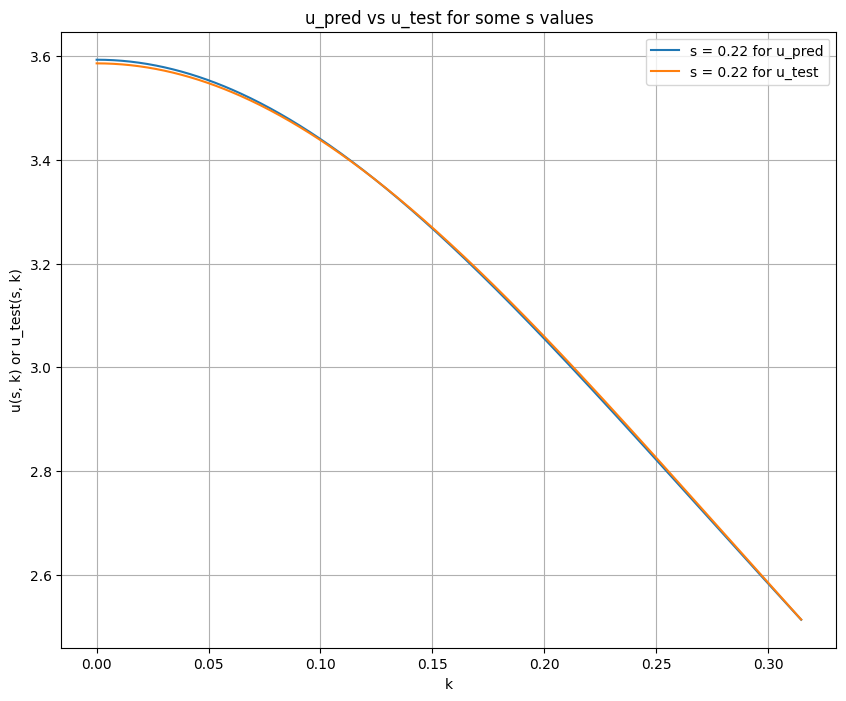

average difference for s = 0.23 : 0.0029240763594540154


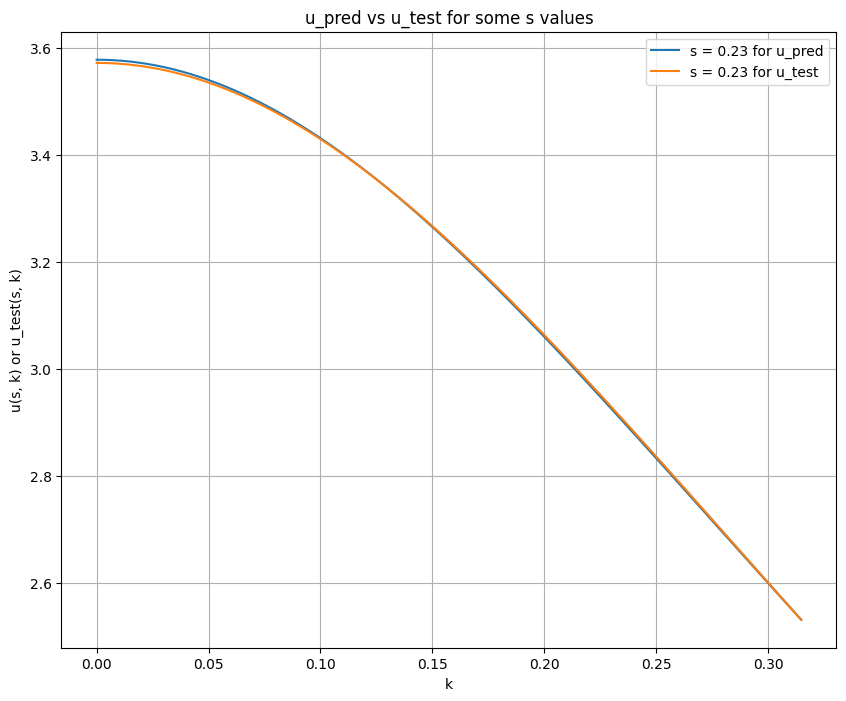

average difference for s = 0.25 : 0.0024672374659692816


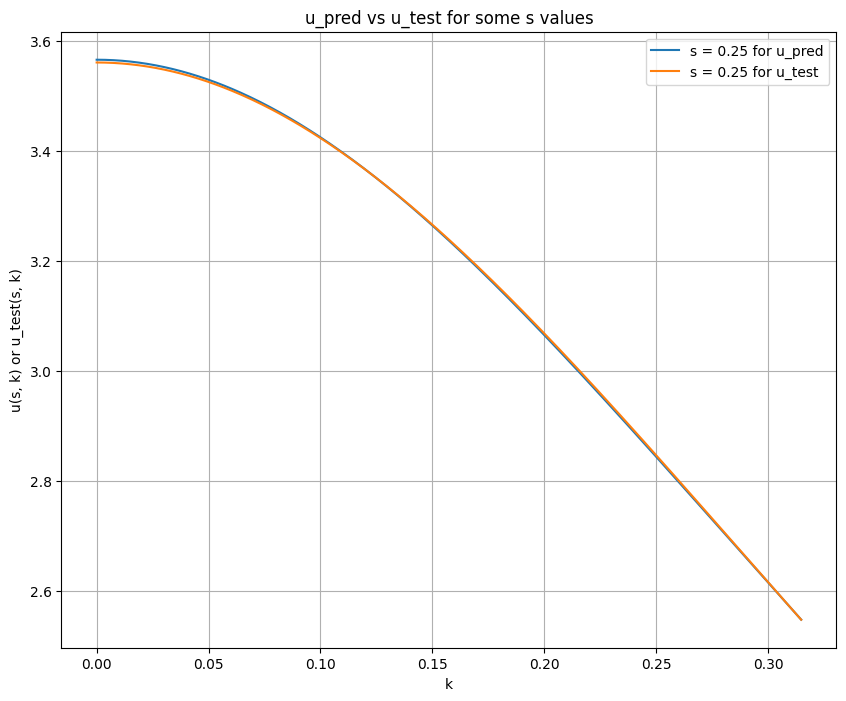

average difference for s = 0.26 : 0.002079923672503364


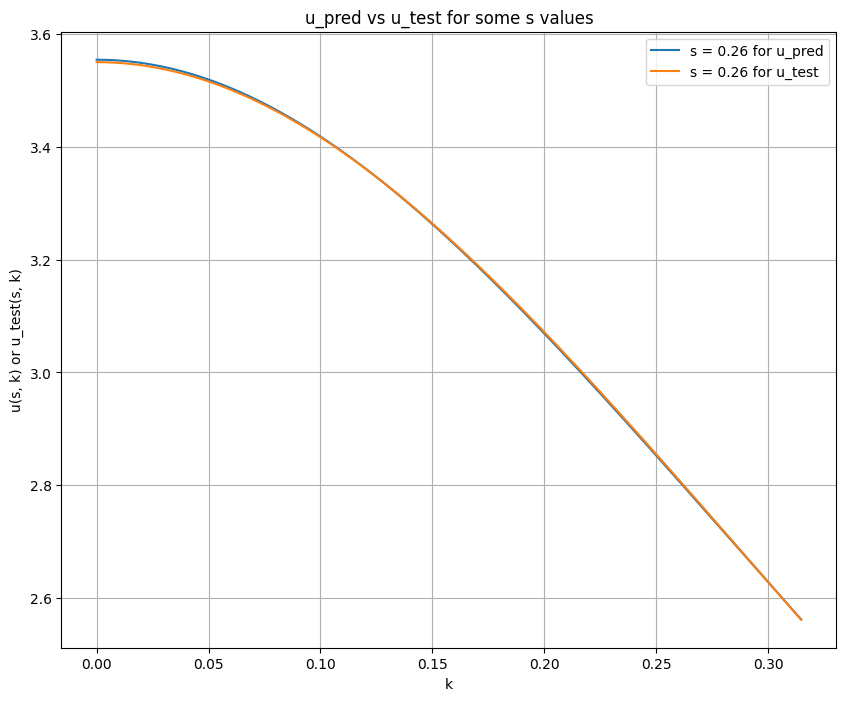

average difference for s = 0.28 : 0.0017523352849580878


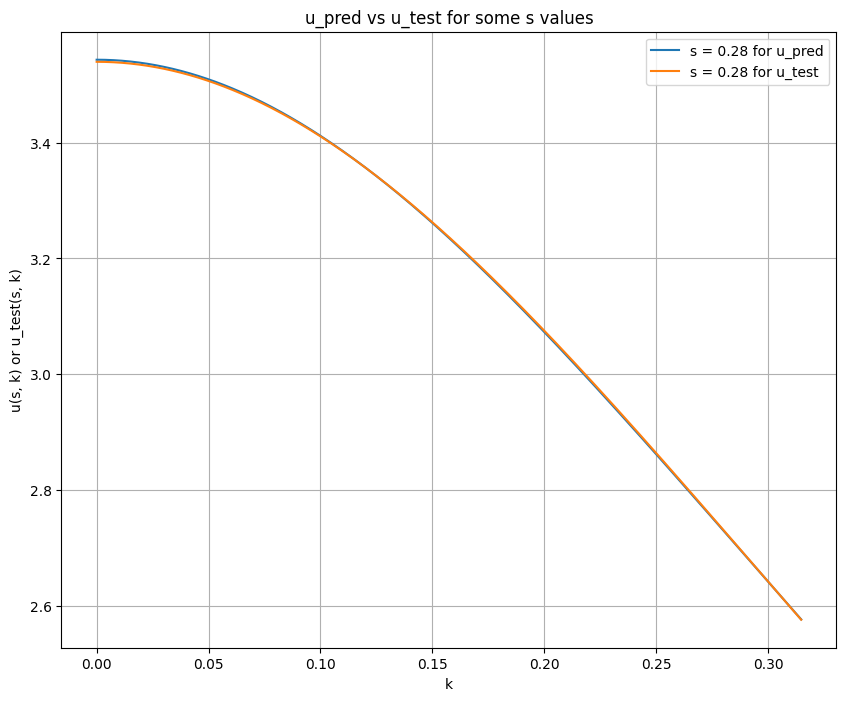

average difference for s = 0.30 : 0.0014759894144348129


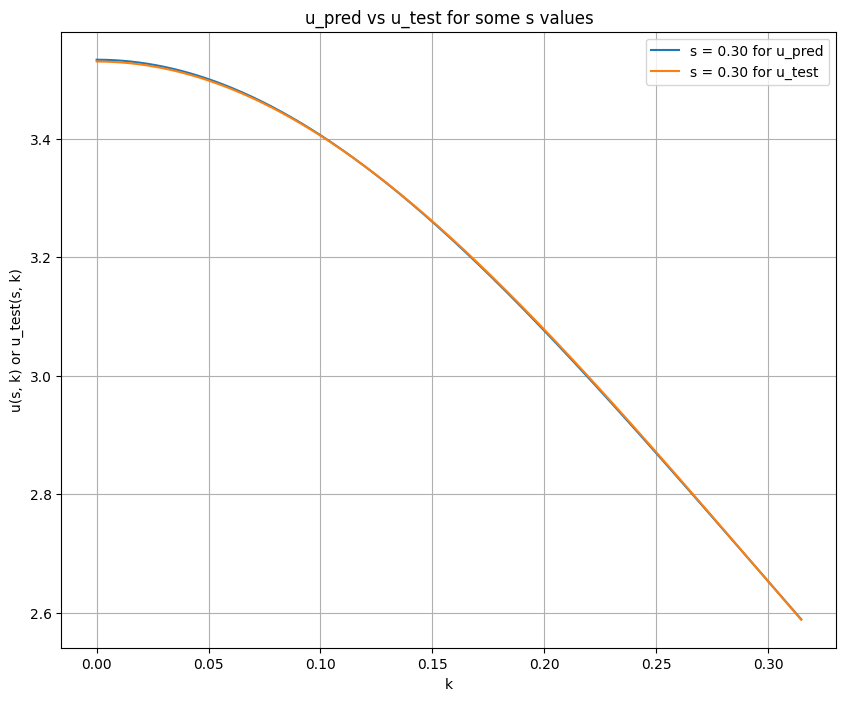

average difference for s = 0.31 : 0.0012438702271707846


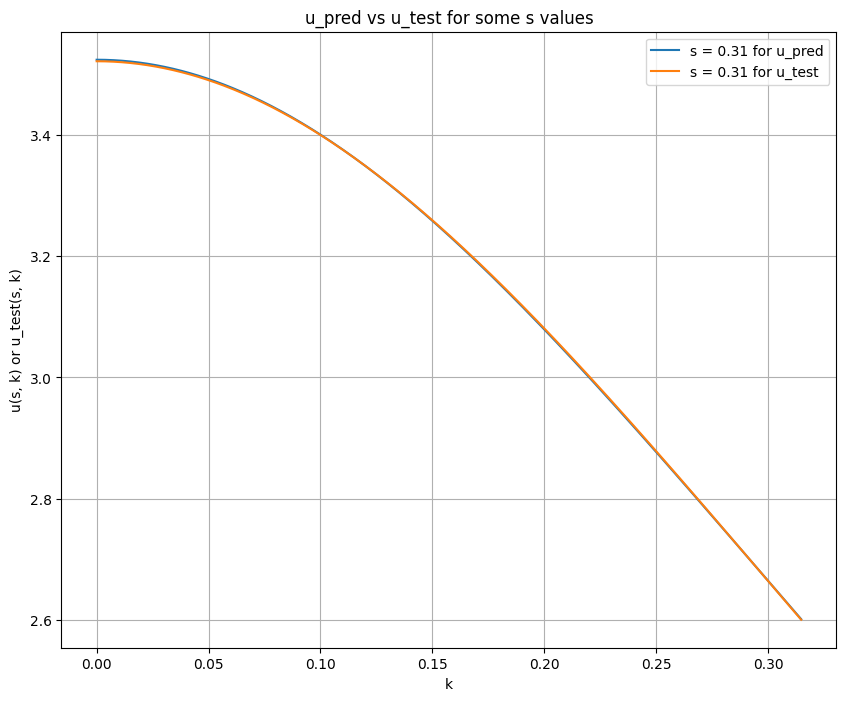

average difference for s = 0.33 : 0.0010499443323435278


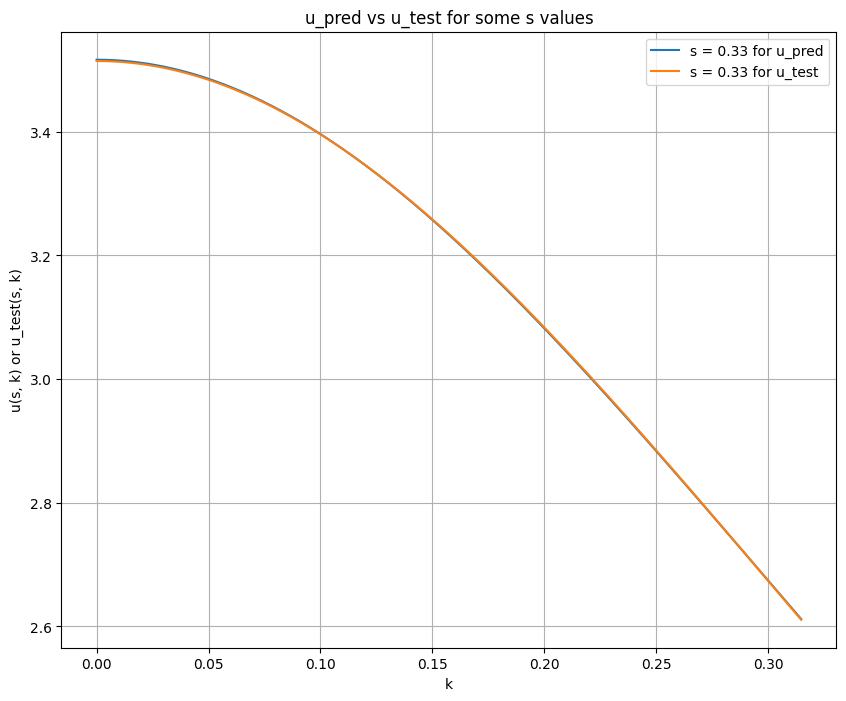

average difference for s = 0.34 : 0.00088912727293292


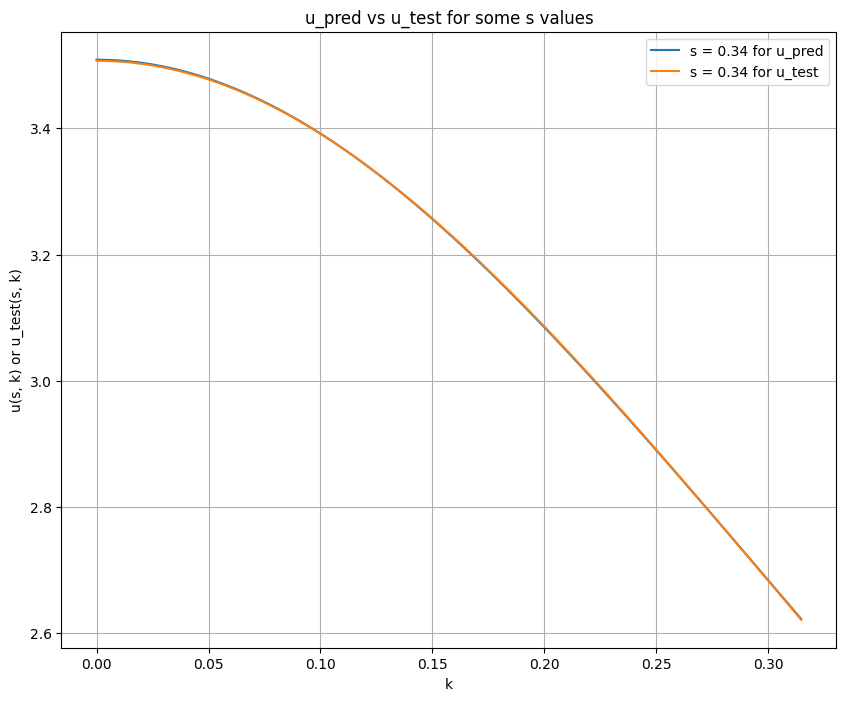

average difference for s = 0.36 : 0.0007570525000263028


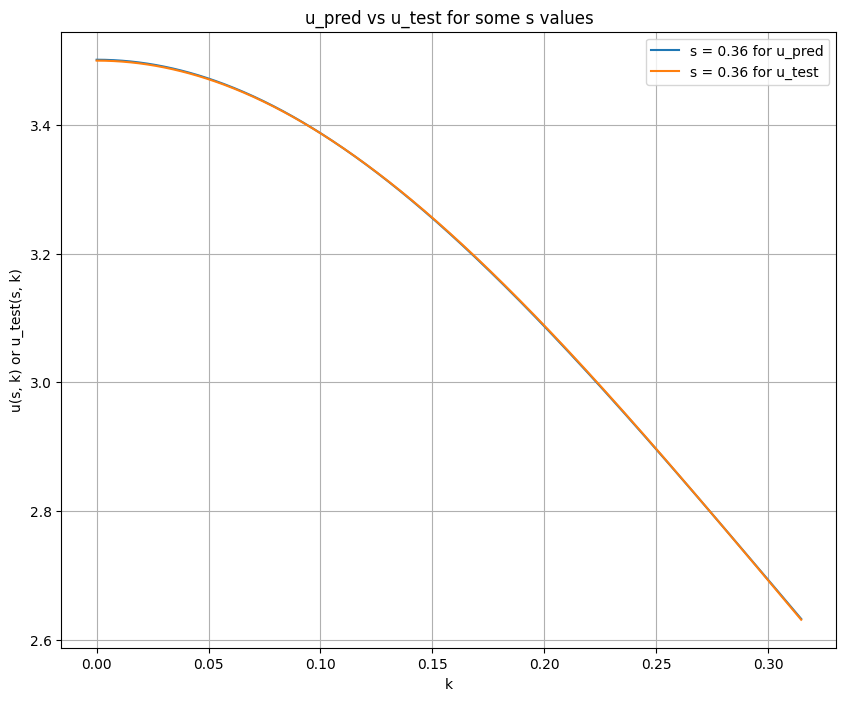

average difference for s = 0.38 : 0.0006499824644448333


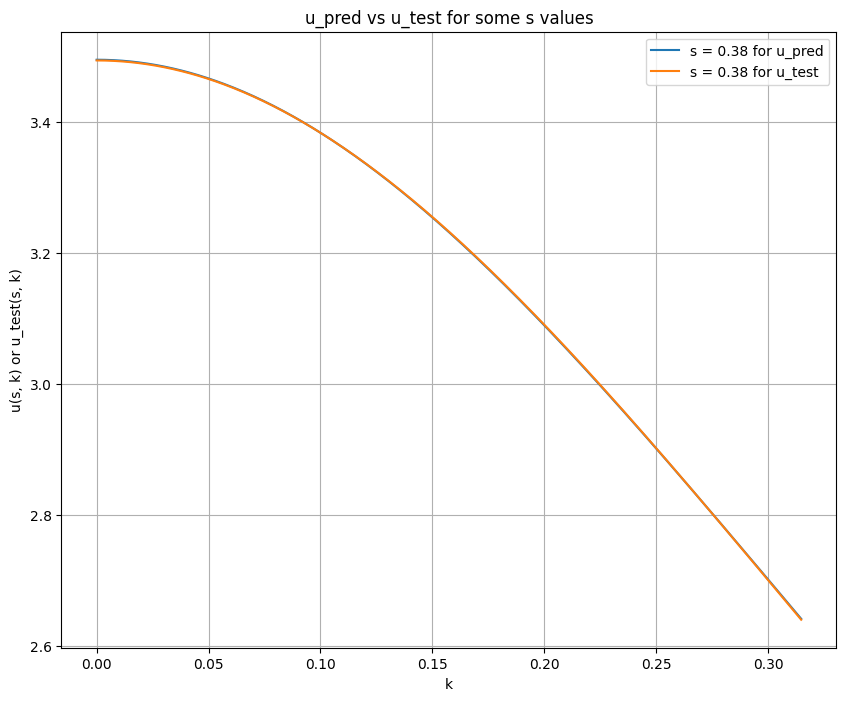

average difference for s = 0.39 : 0.0005647757275369471


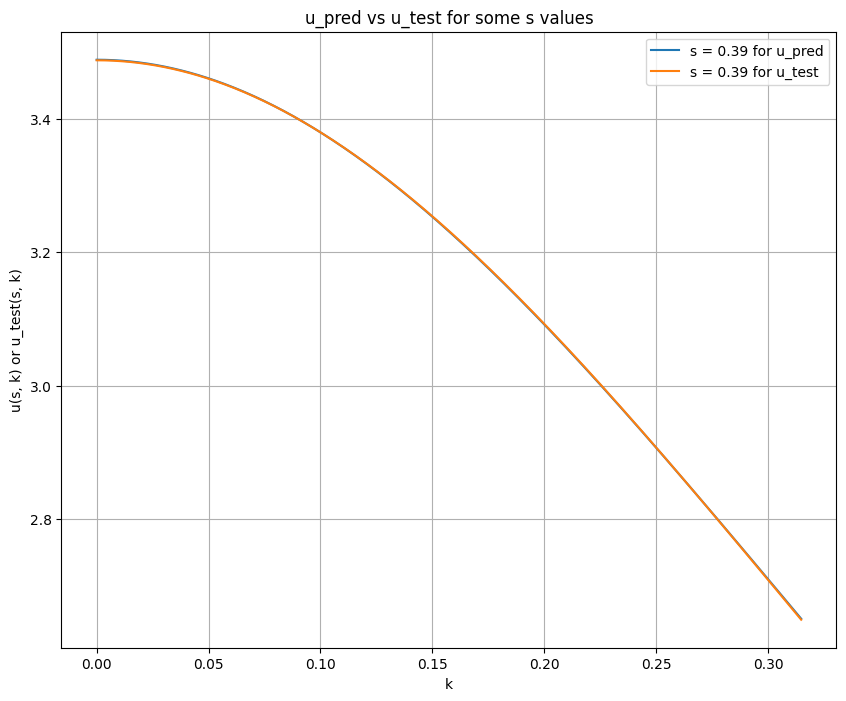

average difference for s = 0.41 : 0.0004988231022369041


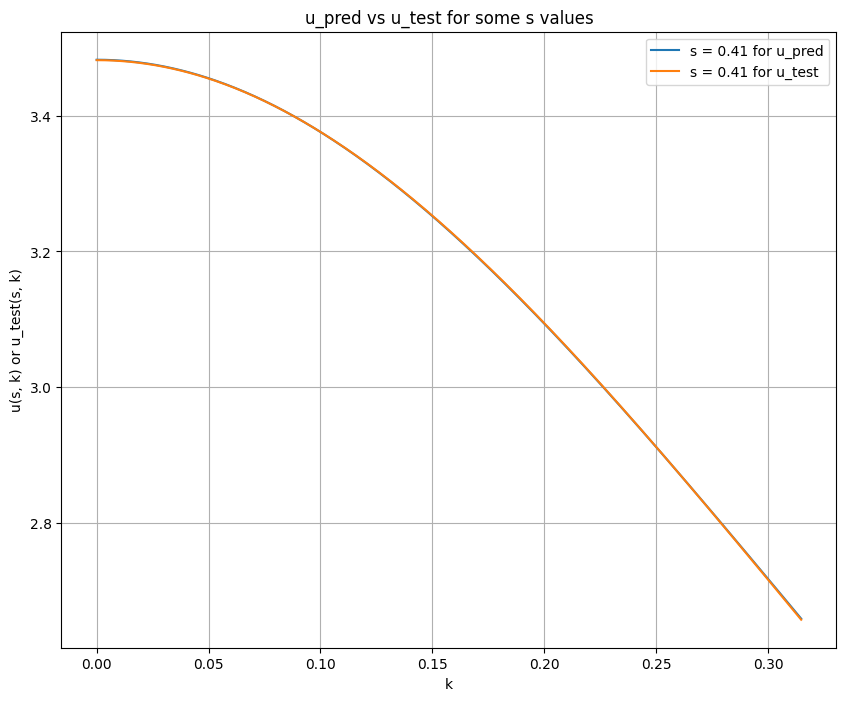

average difference for s = 0.42 : 0.0004501089479036402


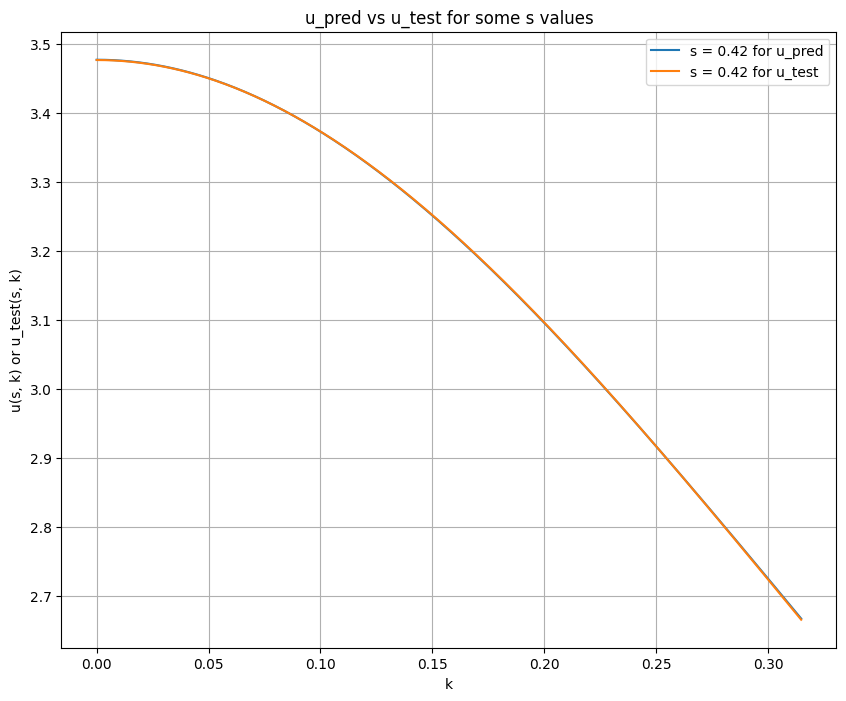

average difference for s = 0.44 : 0.0004173299847741765


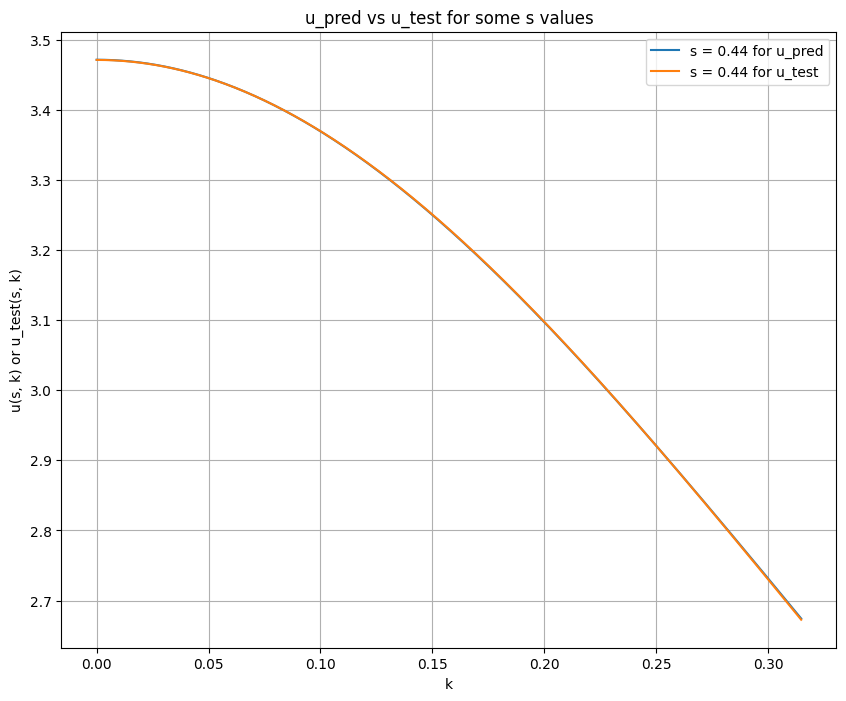

average difference for s = 0.46 : 0.0004002767980337225


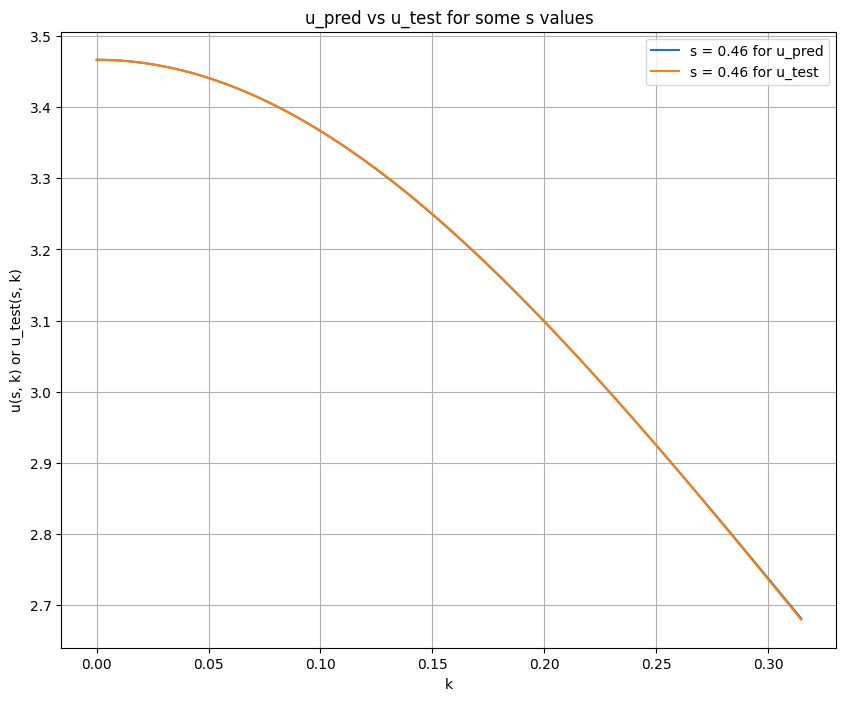

average difference for s = 0.47 : 0.00040172371664877016


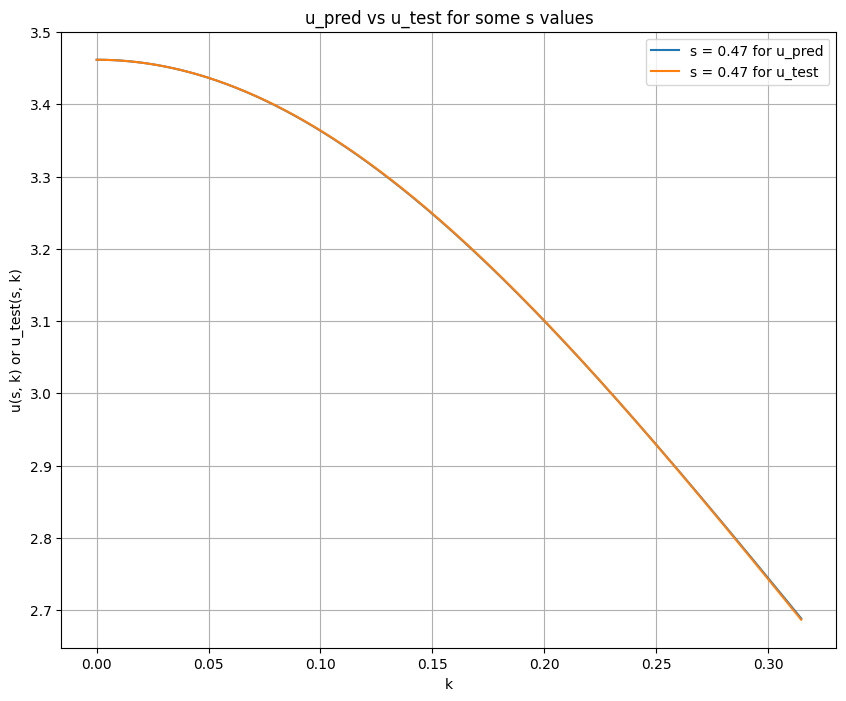

average difference for s = 0.49 : 0.0004287744683974957


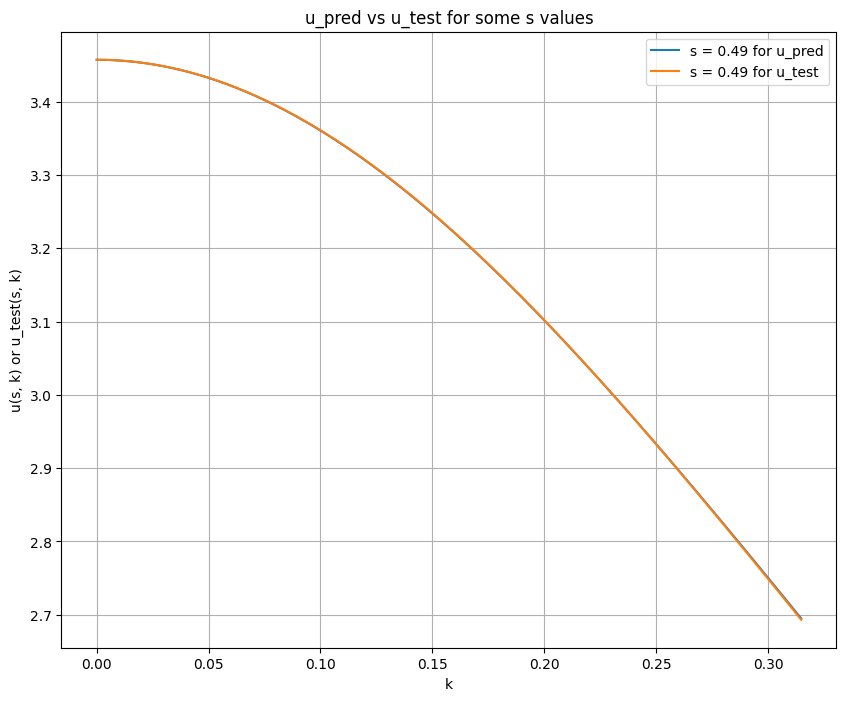

average difference for s = 0.50 : 0.0004548652699771614


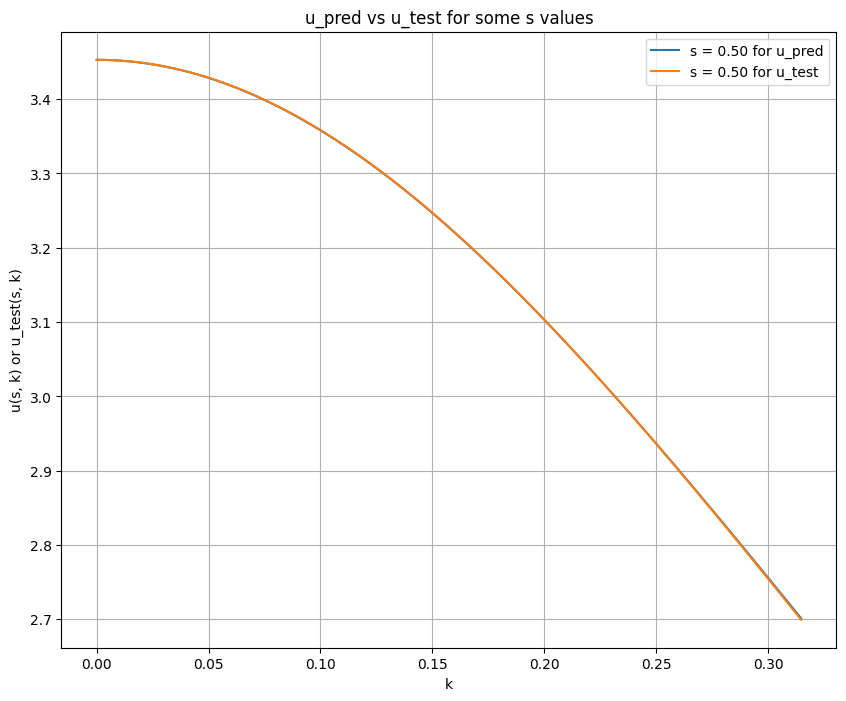

average difference for s = 0.52 : 0.0004777319659534367


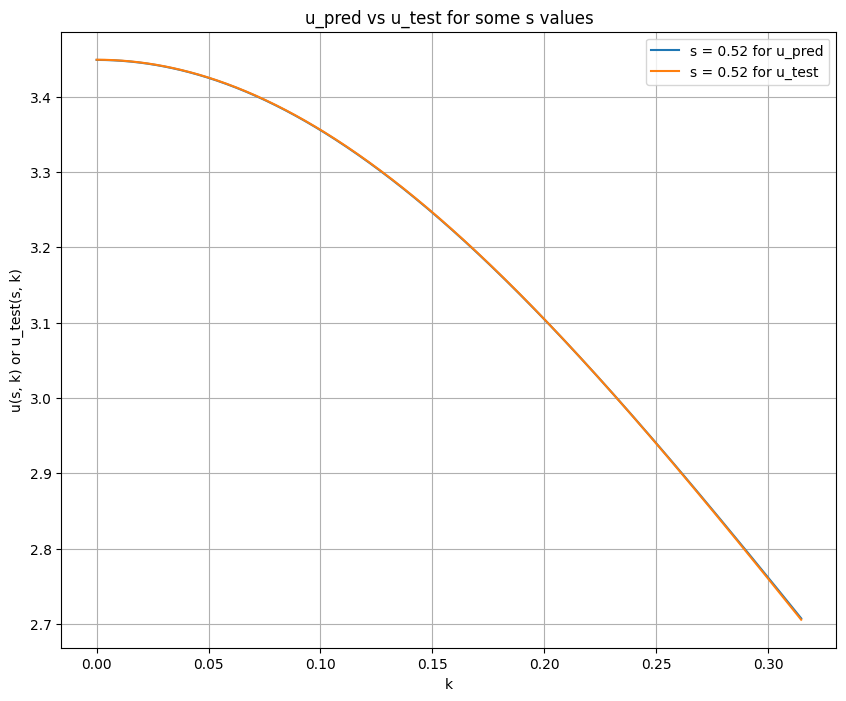

average difference for s = 0.54 : 0.0004972738692385716


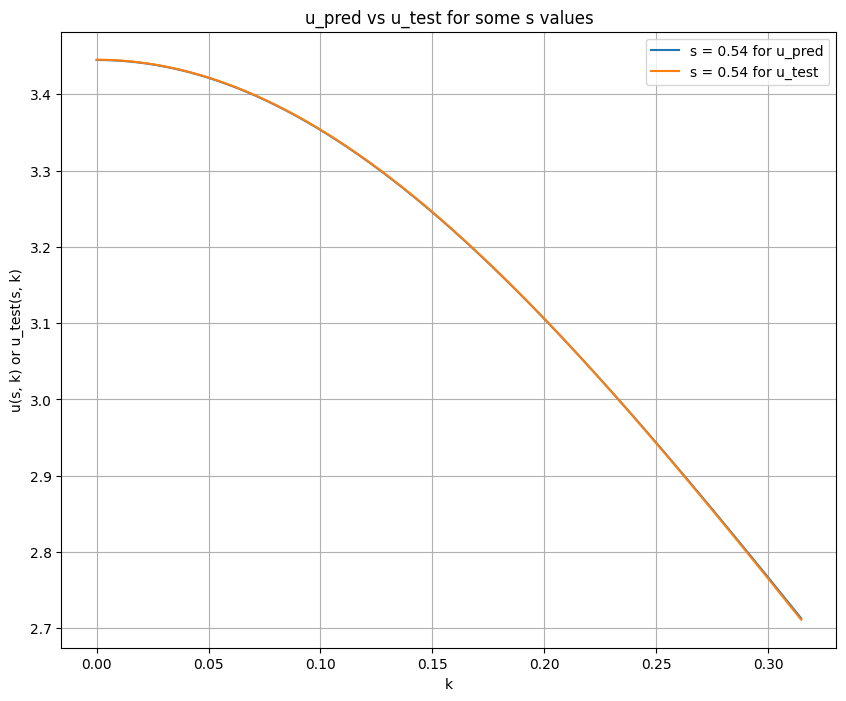

average difference for s = 0.55 : 0.0005134759936708973


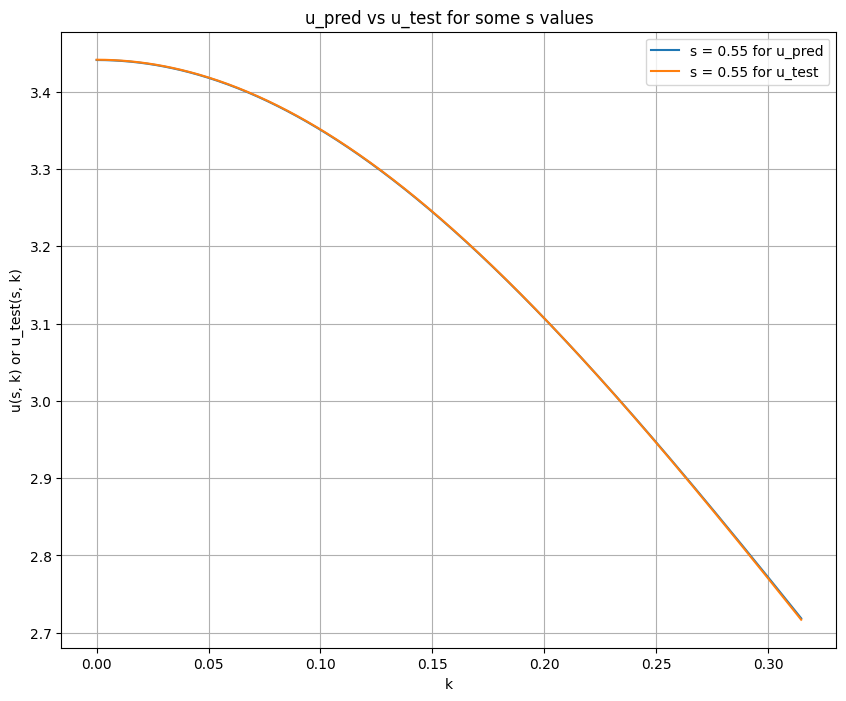

average difference for s = 0.57 : 0.0005263808706828614


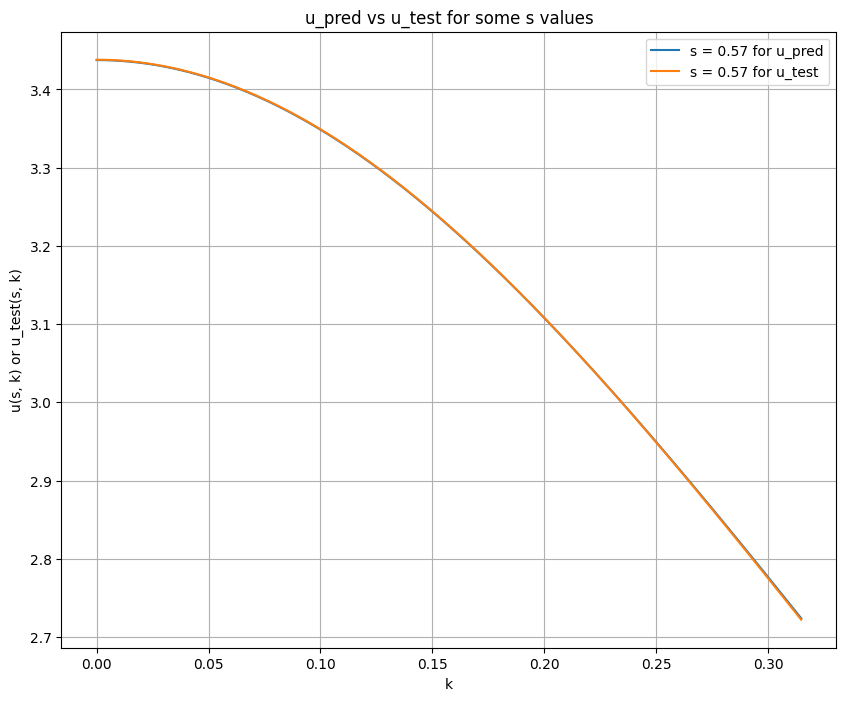

average difference for s = 0.58 : 0.0005360937111869291


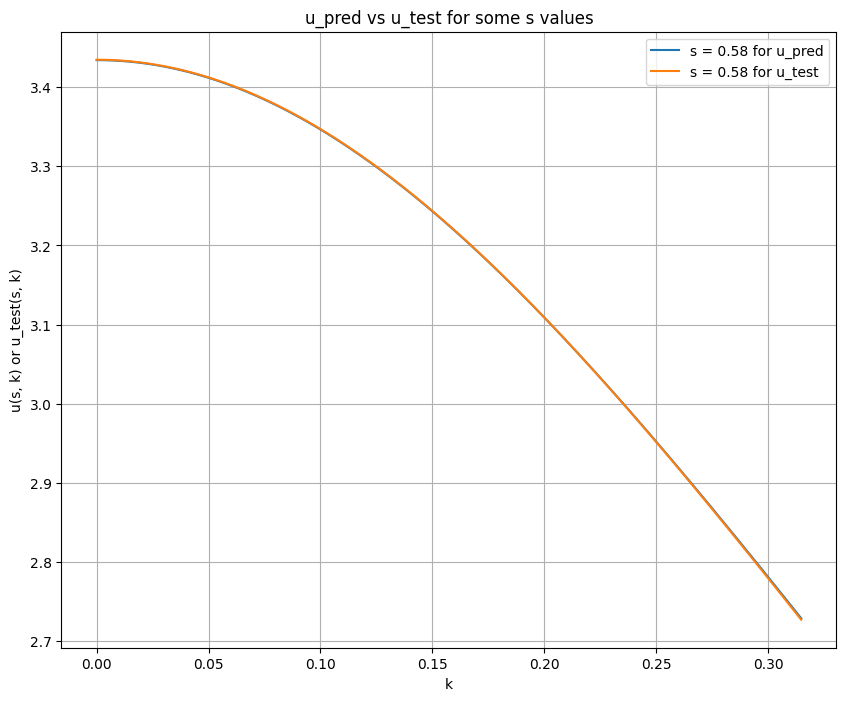

average difference for s = 0.60 : 0.0005427433054503421


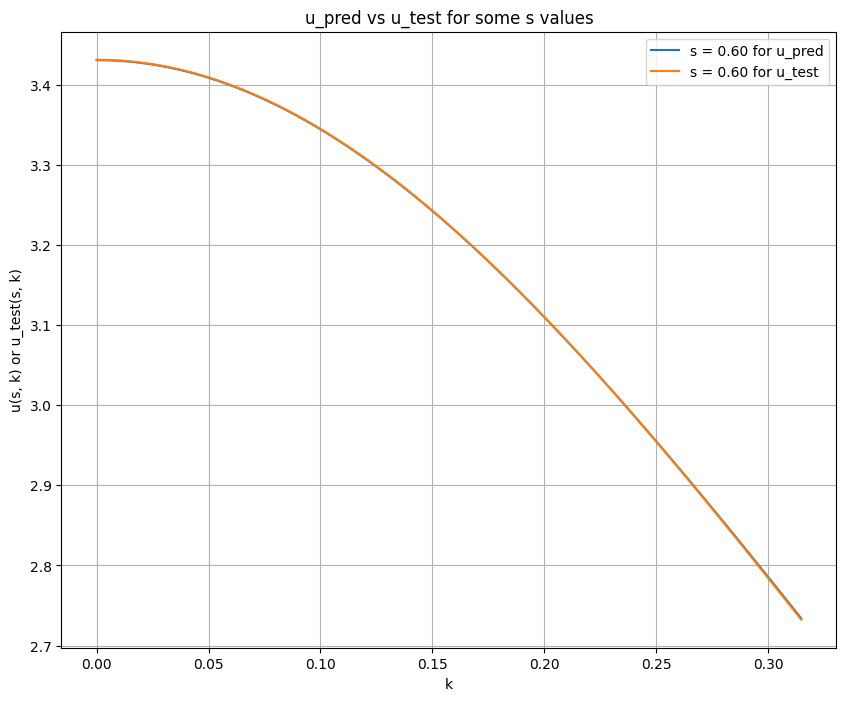

average difference for s = 0.62 : 0.000546494512598156


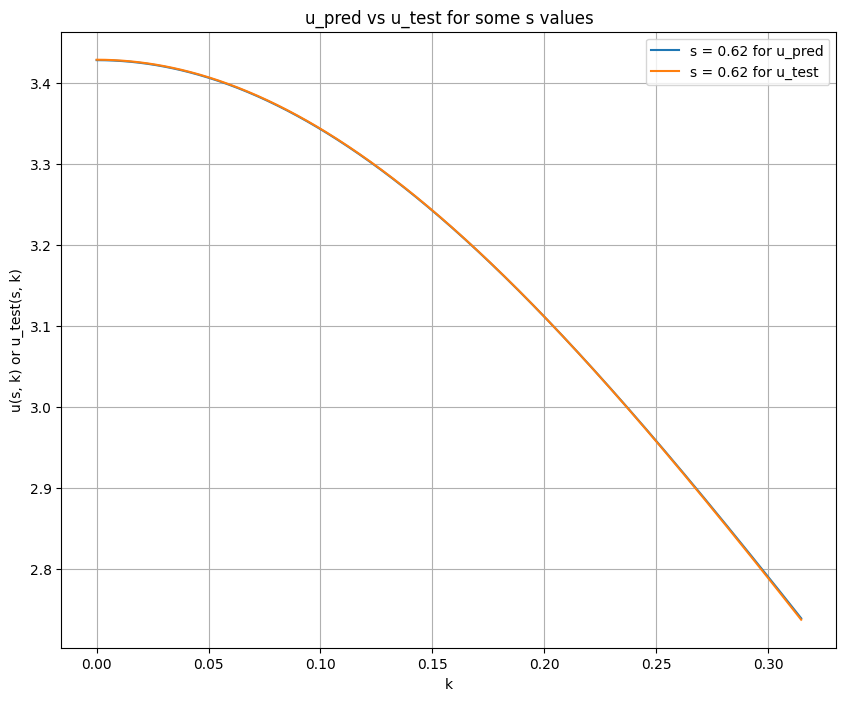

average difference for s = 0.63 : 0.0005475113751431948


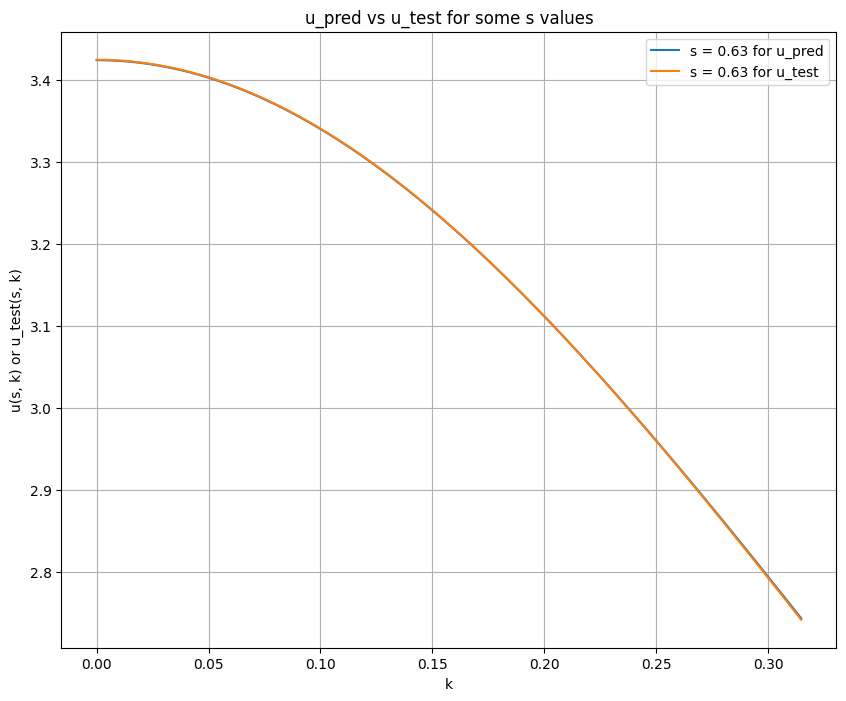

average difference for s = 0.65 : 0.0005459692476514802


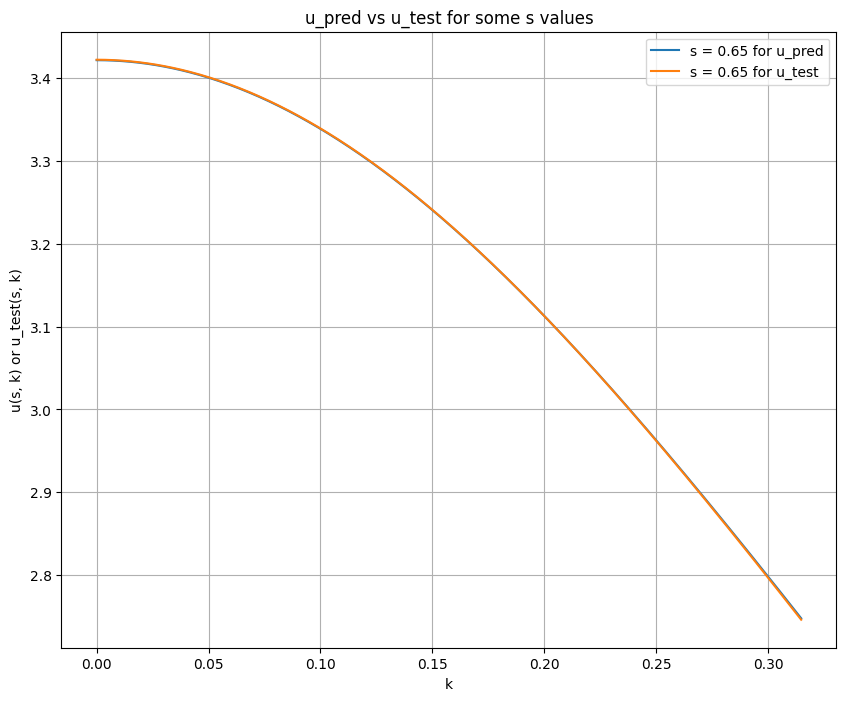

average difference for s = 0.66 : 0.0005420431372662095


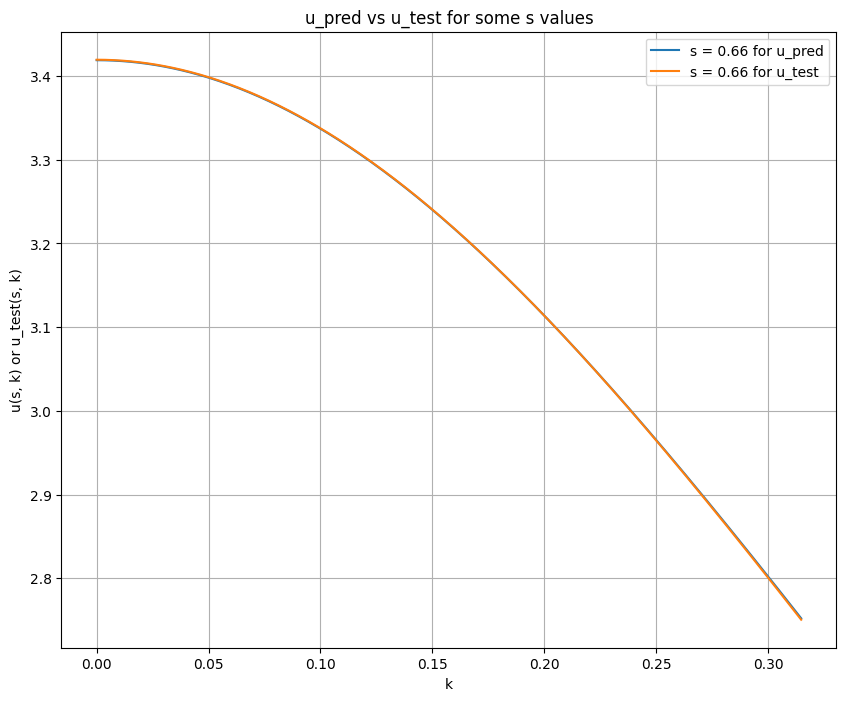

average difference for s = 0.68 : 0.0005359058169700166


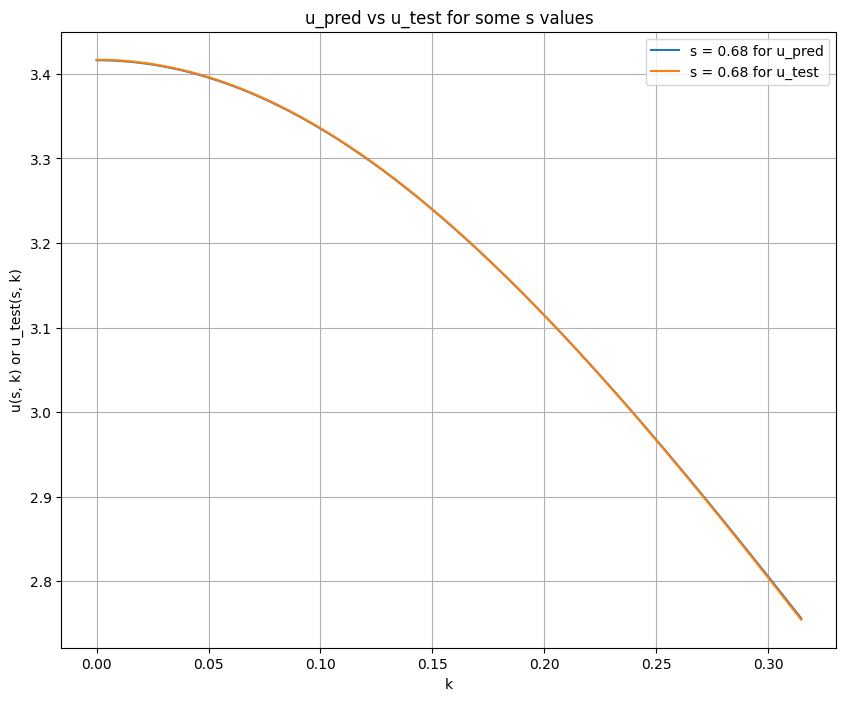

average difference for s = 0.70 : 0.0005277175526942708


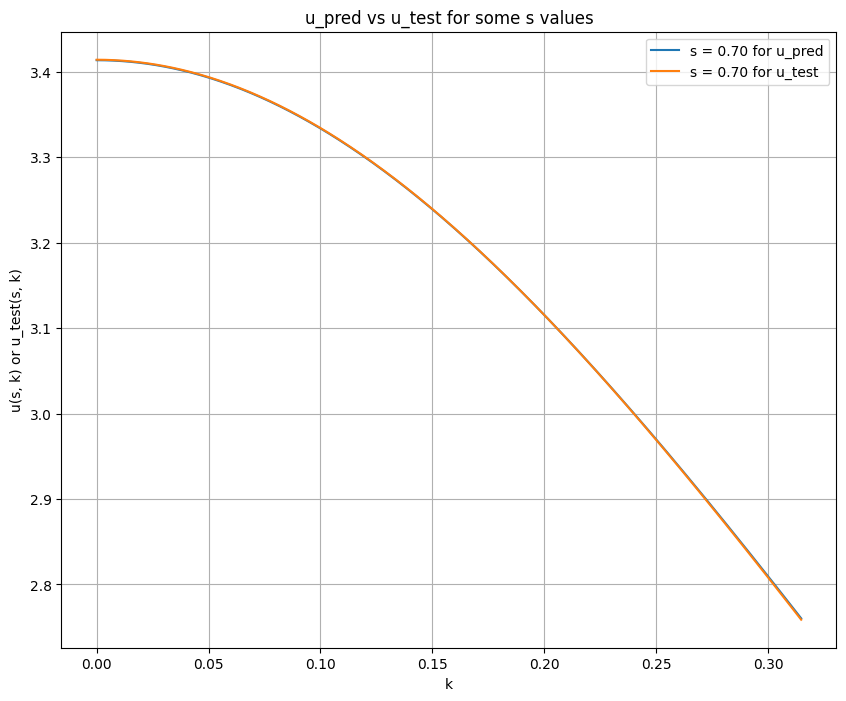

average difference for s = 0.71 : 0.000517640324347


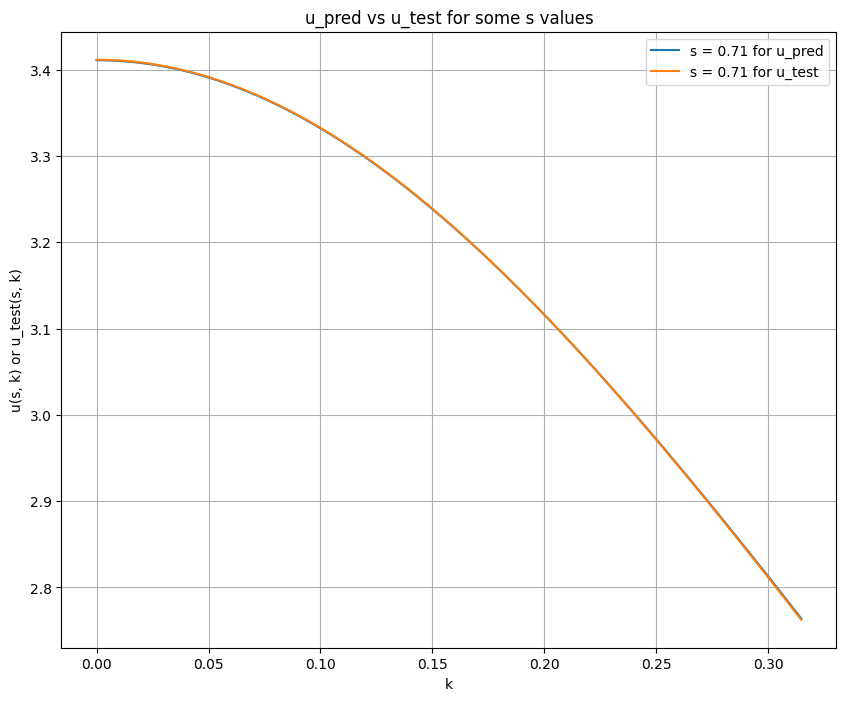

average difference for s = 0.73 : 0.000505818782163808


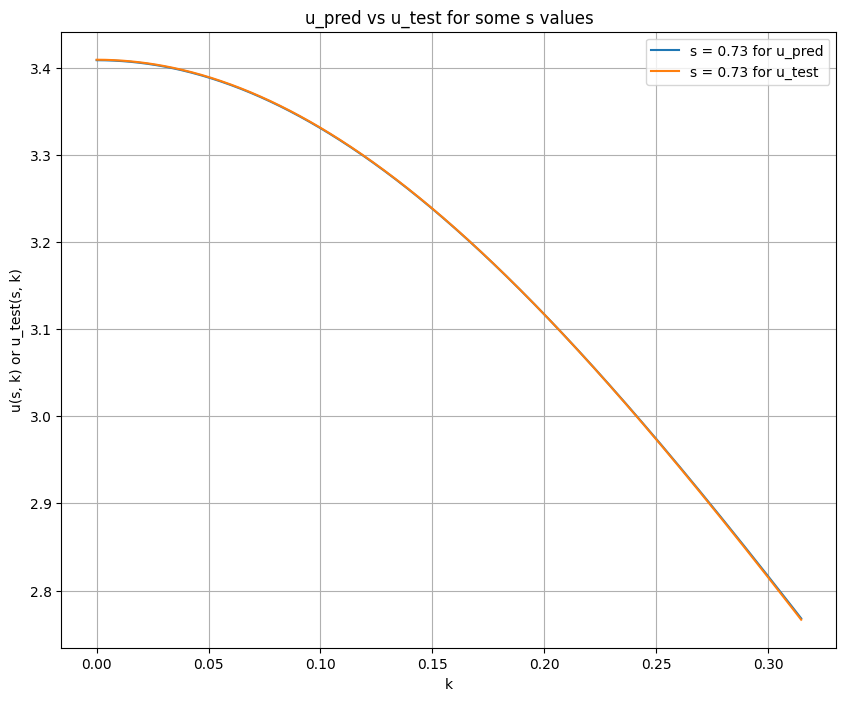

average difference for s = 0.74 : 0.000492398233612727


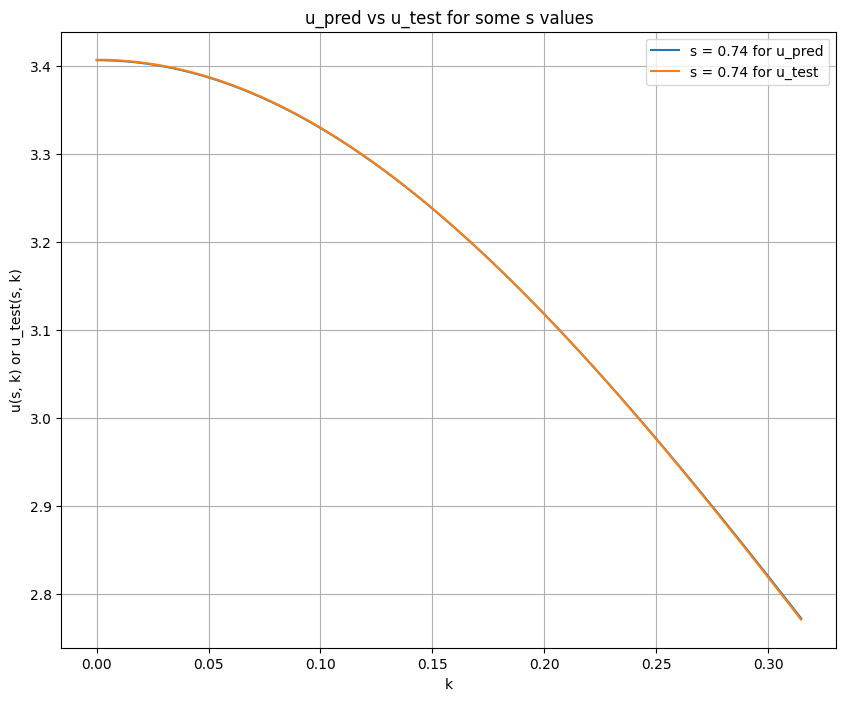

average difference for s = 0.76 : 0.00047750300745468444


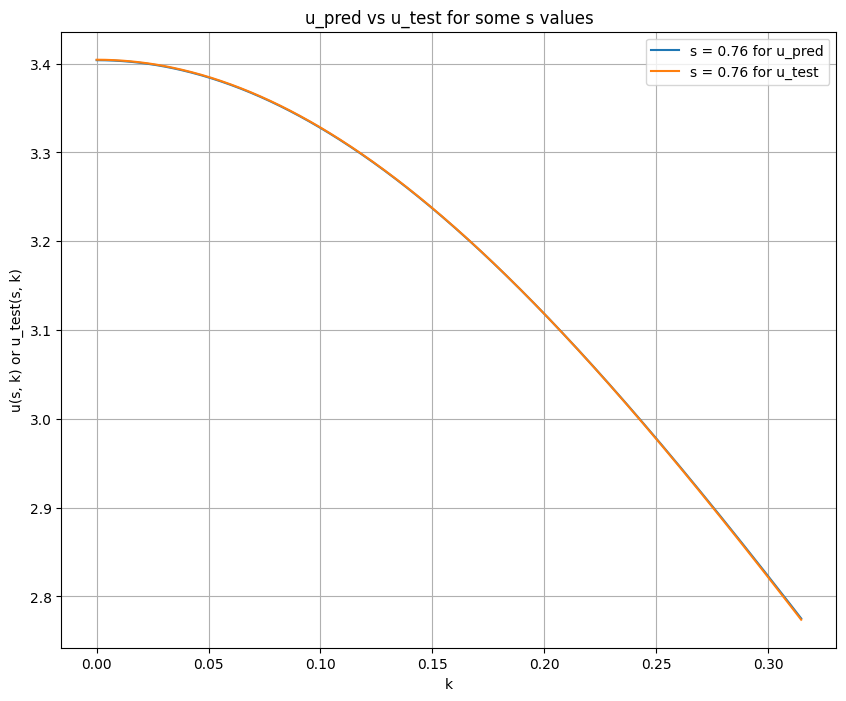

average difference for s = 0.78 : 0.0004612629359332265


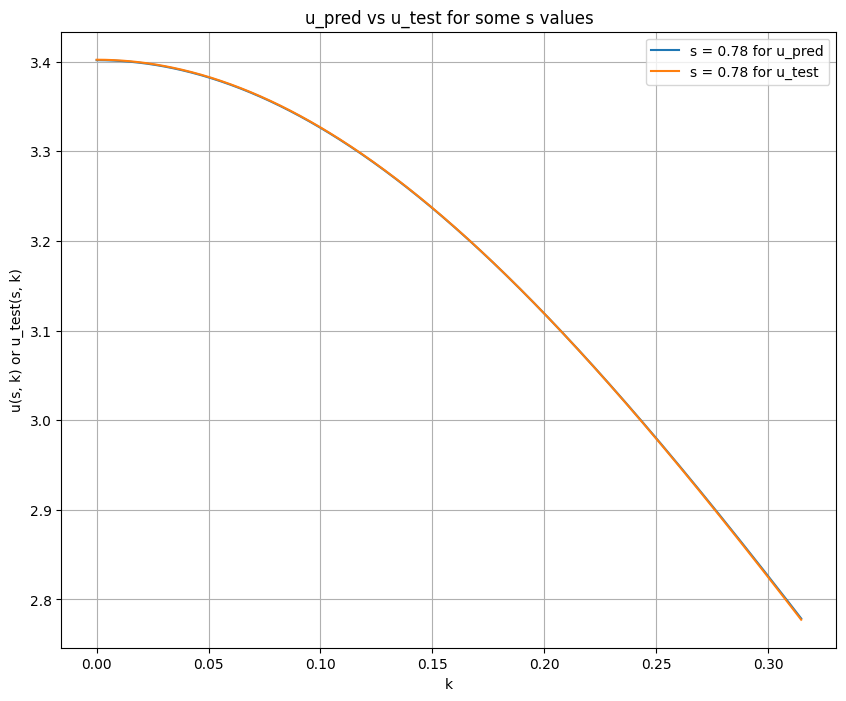

average difference for s = 0.79 : 0.0004437887490245913


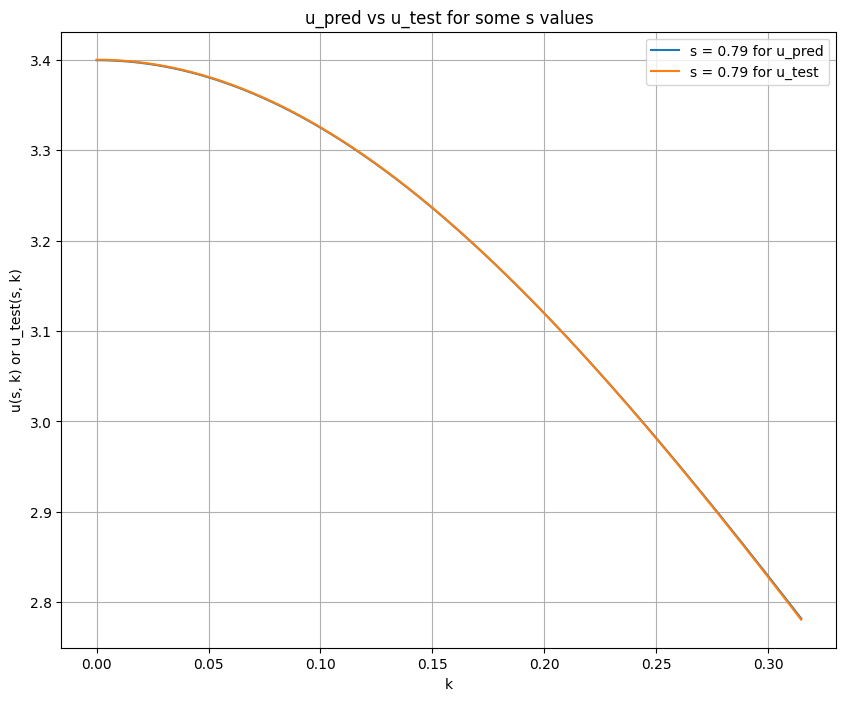

average difference for s = 0.81 : 0.0004251882013135182


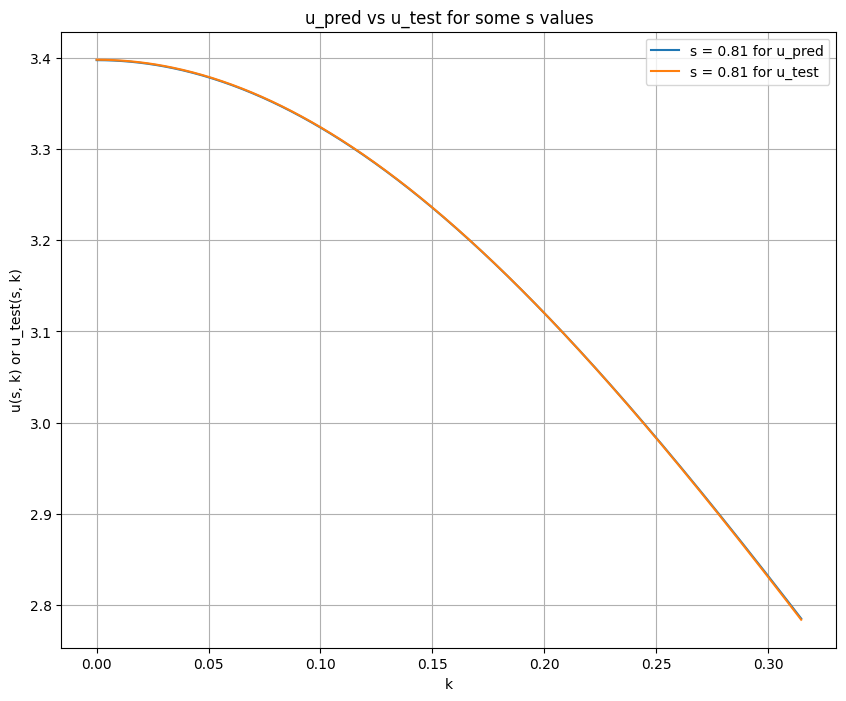

average difference for s = 0.82 : 0.0004055670960298592


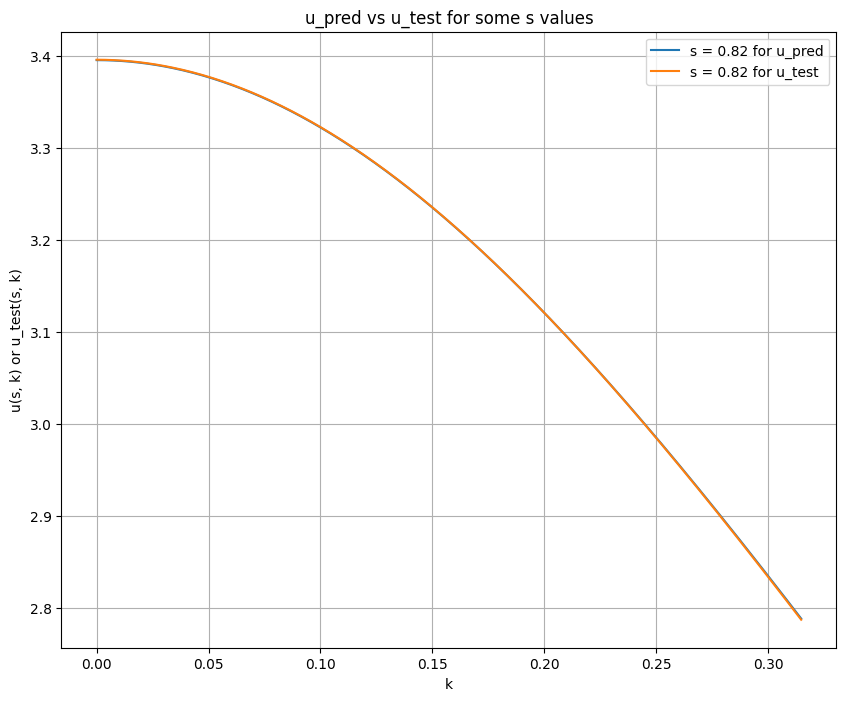

average difference for s = 0.84 : 0.00038501414269306264


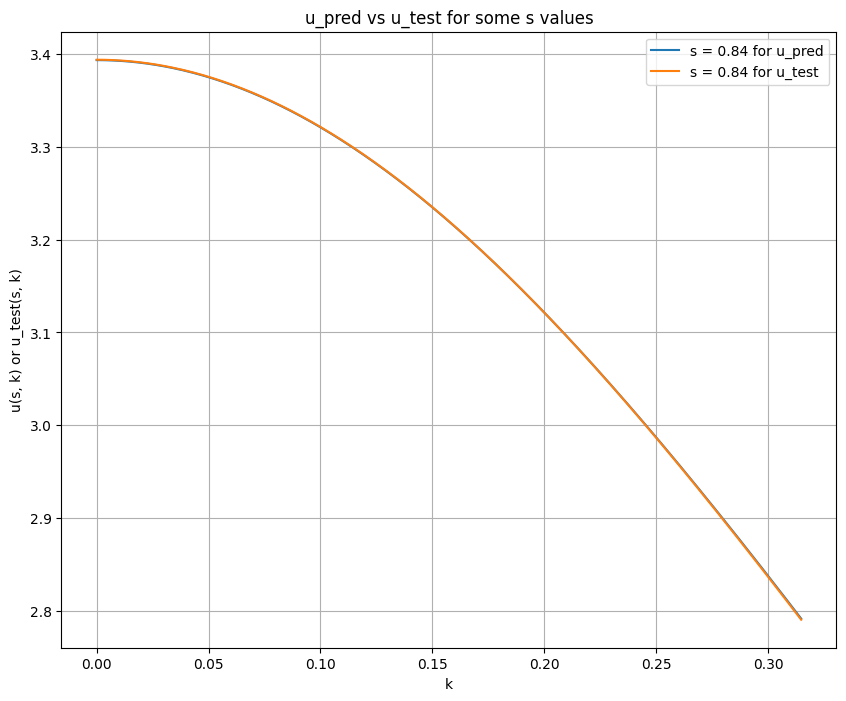

average difference for s = 0.86 : 0.00036362280356298094


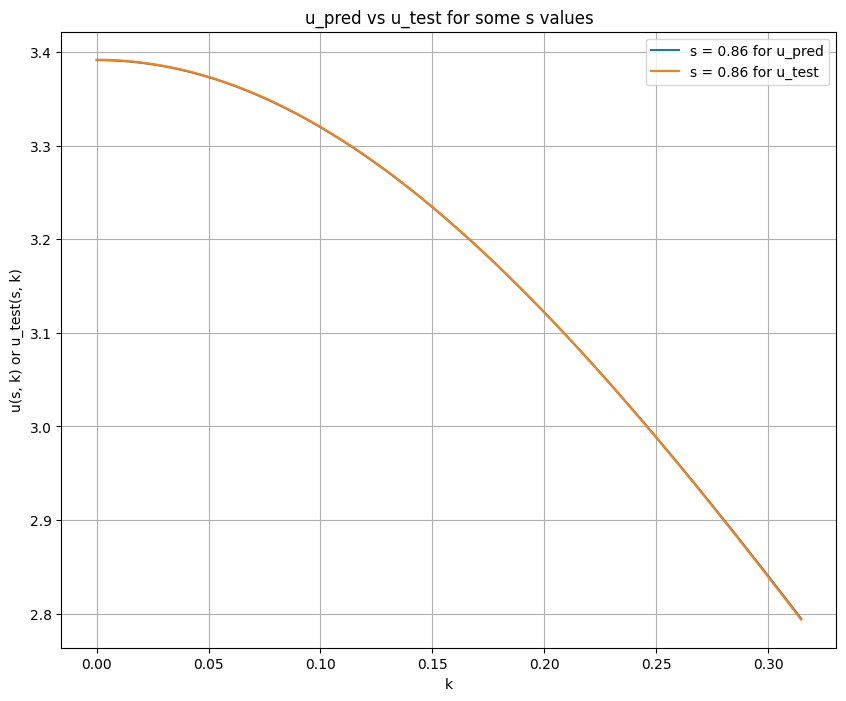

average difference for s = 0.87 : 0.00034147907080805506


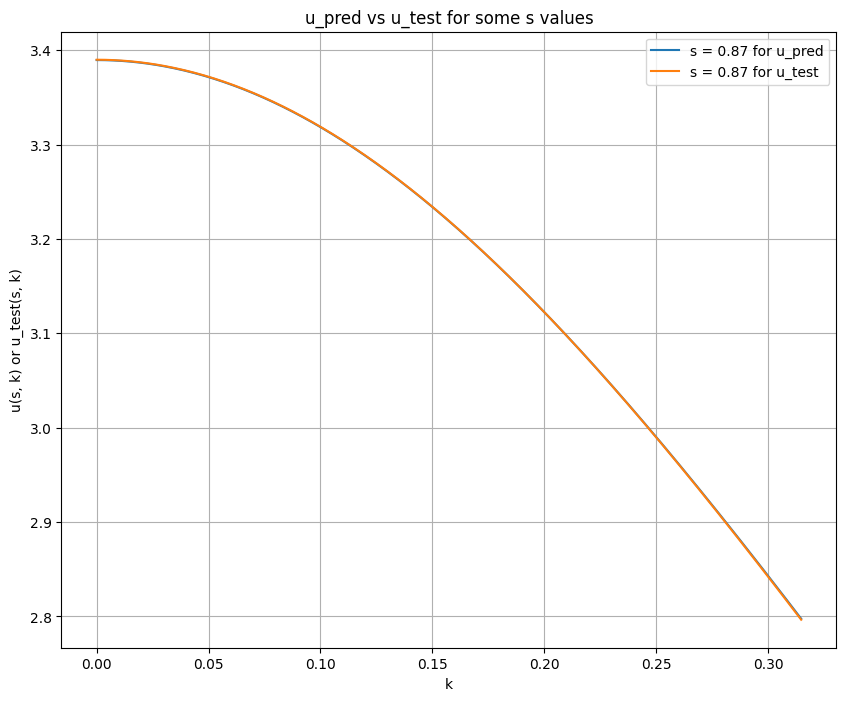

average difference for s = 0.89 : 0.00031866255183707803


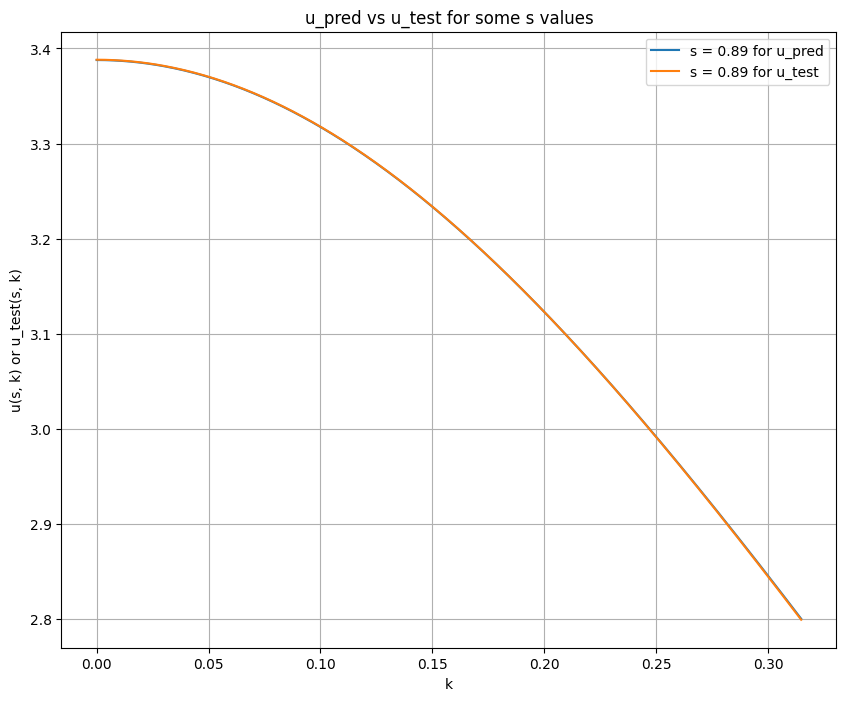

average difference for s = 0.90 : 0.00029525835662659984


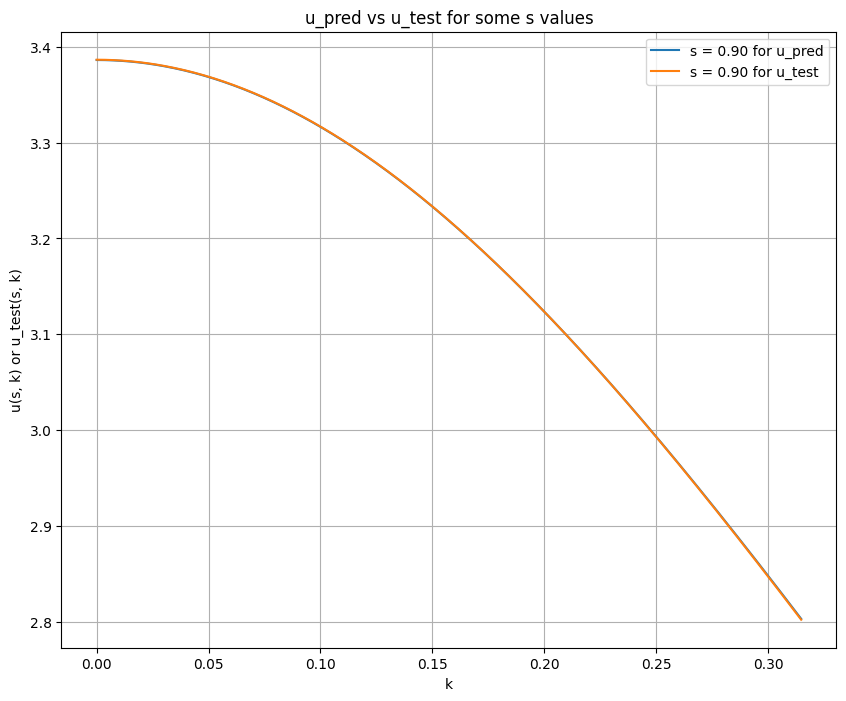

average difference for s = 0.92 : 0.000271347705073901


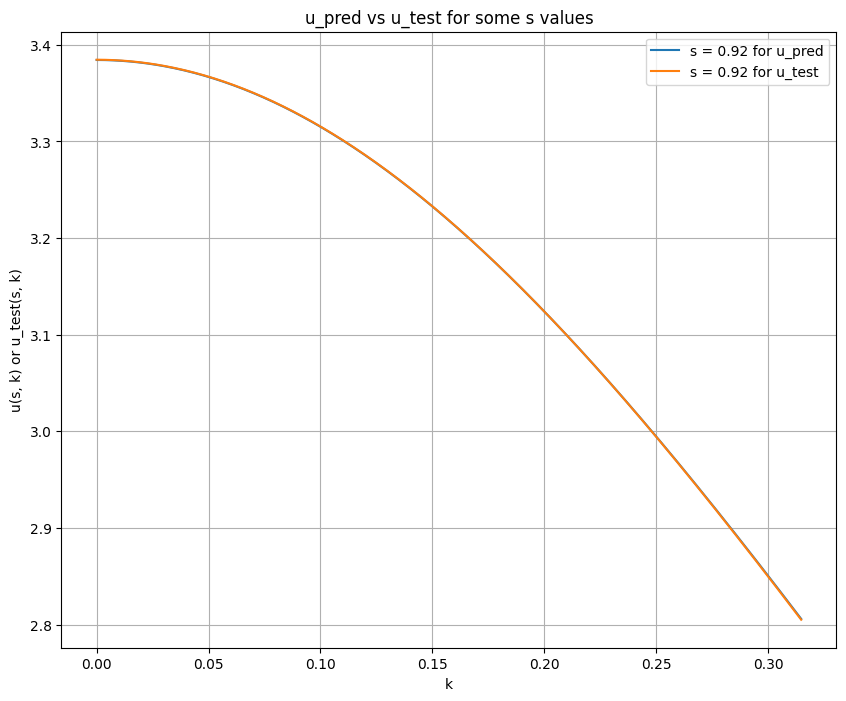

average difference for s = 0.94 : 0.00024701352284070576


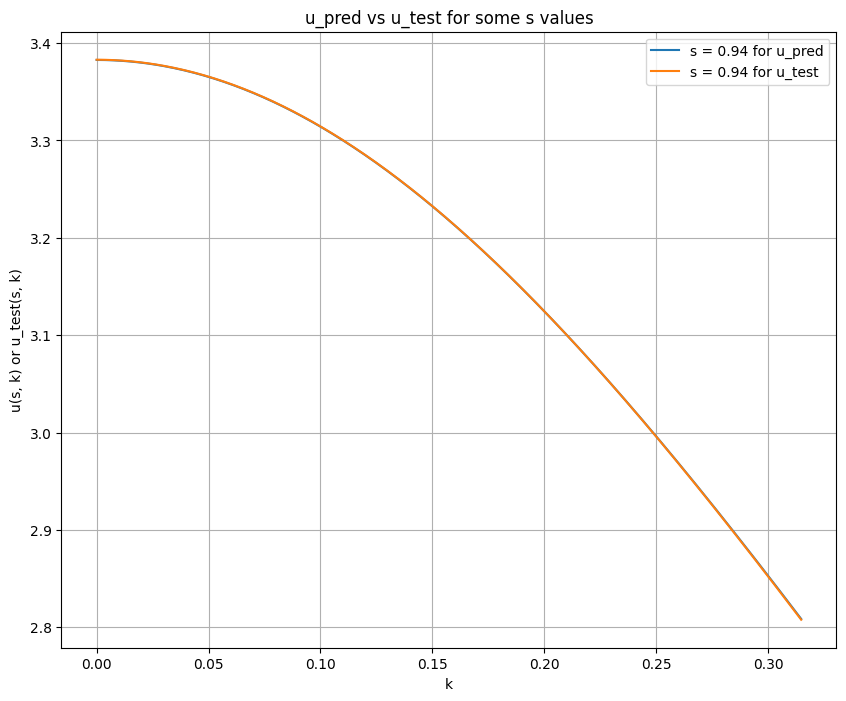

average difference for s = 0.95 : 0.00022234974601585922


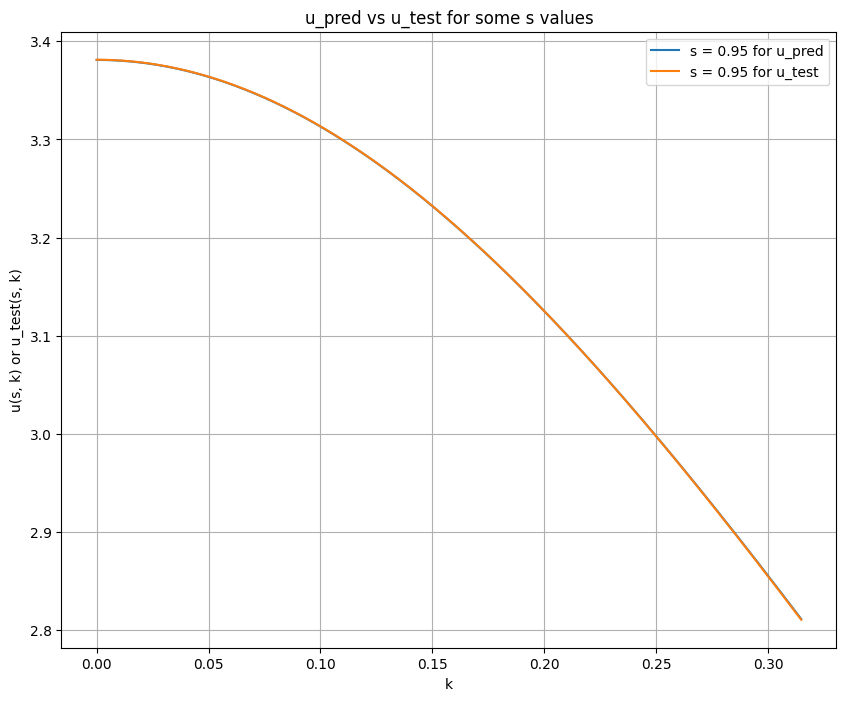

average difference for s = 0.97 : 0.00019746112120674298


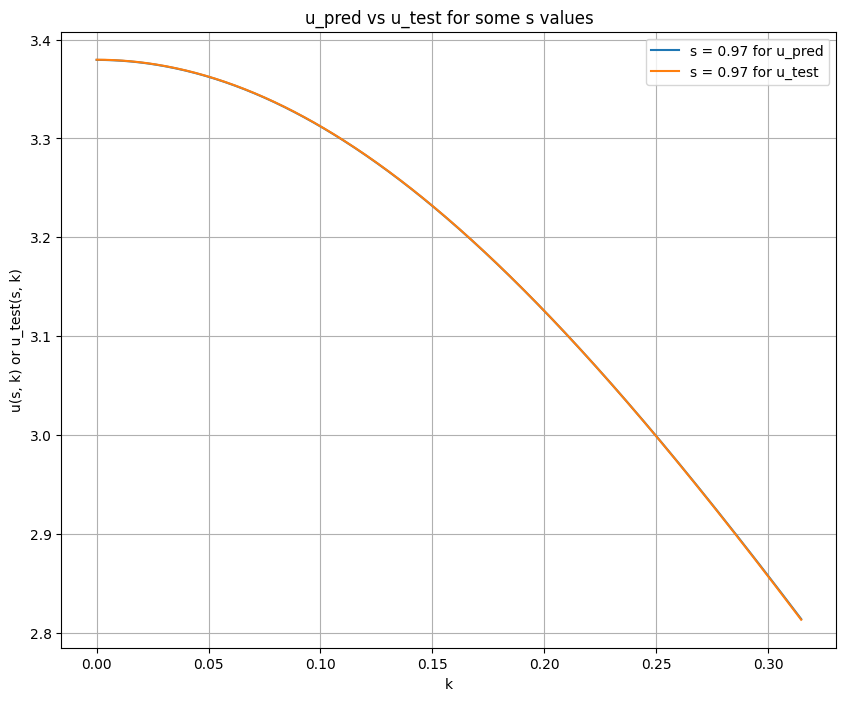

average difference for s = 0.98 : 0.0001724755440698278


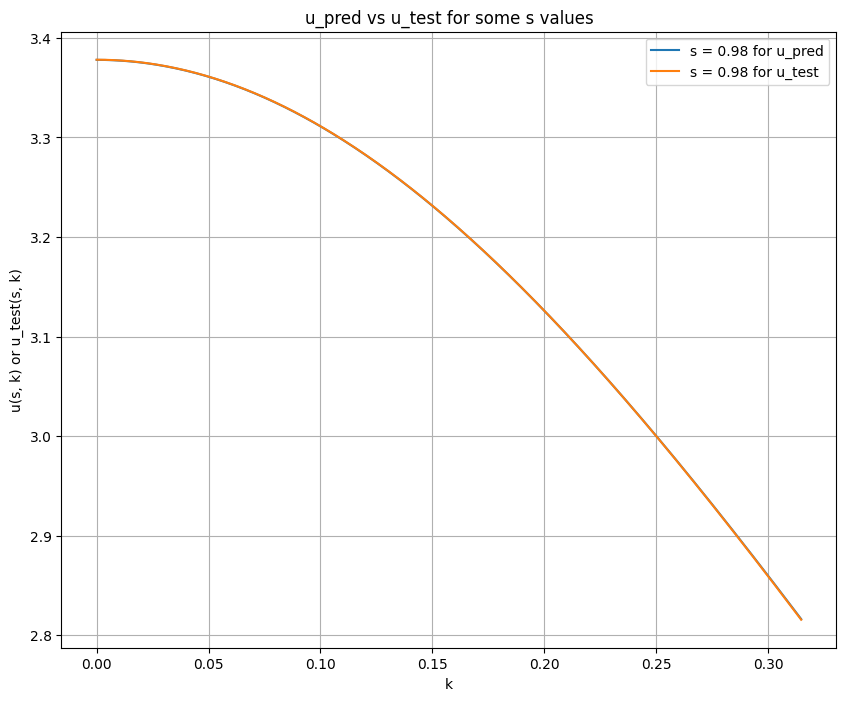

In [55]:
# compare u_pred and u_test

for i in range(0, s_vals.shape[0], s_vals.shape[0]//50):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u_pred vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f} for u_pred")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u_pred[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()